In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as mp
import seaborn as sb

from pathlib import Path
from IPython.display import display
from prophet import Prophet
from scipy.stats import f_oneway

db = sqlite3.connect('../data/movies_project.db')

movies_df = pd.read_sql_query("SELECT * FROM movies", db)
starring_df = pd.read_sql_query("SELECT * FROM starring", db)
genres_df = pd.read_sql_query("SELECT * FROM genres", db)
directors_df = pd.read_sql_query("SELECT * FROM directors", db)
platforms_df = pd.read_sql_query("SELECT * FROM platforms", db)

#### Phase 4 — Genre Momentum
If certain genres dominate today, how are they trending over time?

To explore this, I created a pivot table of average ratings by genre × decade and visualized it with a heatmap.

In [2]:
movies_df['decade']=(movies_df['year']//10)*10
movies_genre = movies_df.merge(genres_df,left_on='id',right_on='movie_id',how='inner')

movies_matrix = movies_genre.pivot_table(index='genre',columns='decade',values='ratings', aggfunc='mean',fill_value=0)

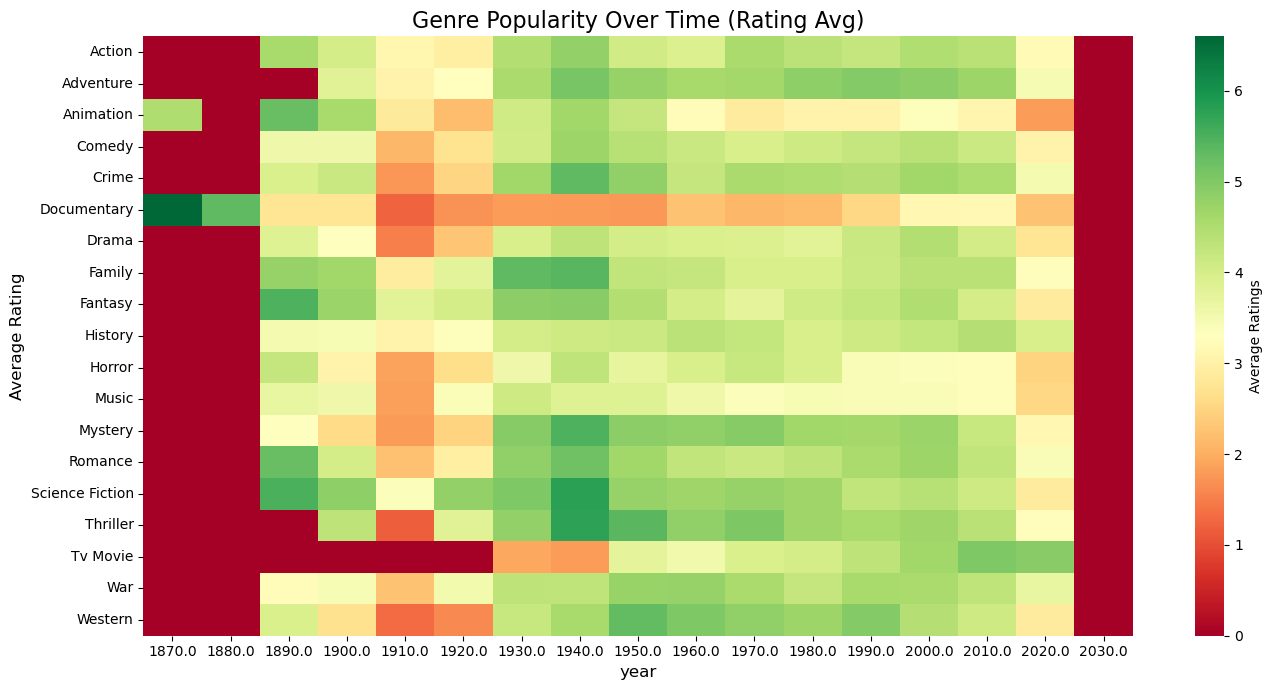

In [3]:
mp.figure(figsize=(14,7))
sb.heatmap(
    movies_matrix,
    cmap='RdYlGn',
    cbar_kws={'label':'Average Ratings'}
    
)

mp.title('Genre Popularity Over Time (Rating Avg)', fontsize=16)
mp.xlabel('year', fontsize=12)
mp.ylabel('Average Rating', fontsize=12)
mp.tight_layout()
mp.show()

**Insights:**
- **Consistent decline:** Genres like Sci-Fi, Fantasy, and Family films maintained strong ratings until the 2020s, when they experienced a sharp downturn. Sci-Fi, for example, saw its average drop to approximately 3.

- **Historical peaks and drops:** Documentaries peaked exceptionally high in the 1870s–1880s before falling sharply, remaining in the mid-to-low range afterward.

- **Decade-specific trends:**
    - The 1910s–1920s were a period of generally low ratings across most genres.
    - The 1930s through the 2010s marked a sustained "green zone" of higher ratings.
      
- **Inconsistent performance:** Animation, despite its historical dominance and a golden age in the 1930s–1950s, has had patchy performance and currently shows some of the lowest ratings in the 2020s.
The "underdog" genre: TV Movies, one of the youngest categories, began slowly but has steadily climbed, maintaining strong ratings through the 2020s.

- **The 2020s:** A decade of weakened quality: The 2020s overall are characterized by weaker creative output, with a downward trend in ratings for many genres.


#### Question: *Which genres are losing momentum, and what does the future look like?*

I used Facebook Prophet to forecast rating trends per genre (only genres with ≥5 data points were included).

21:07:43 - cmdstanpy - INFO - Chain [1] start processing
21:07:43 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


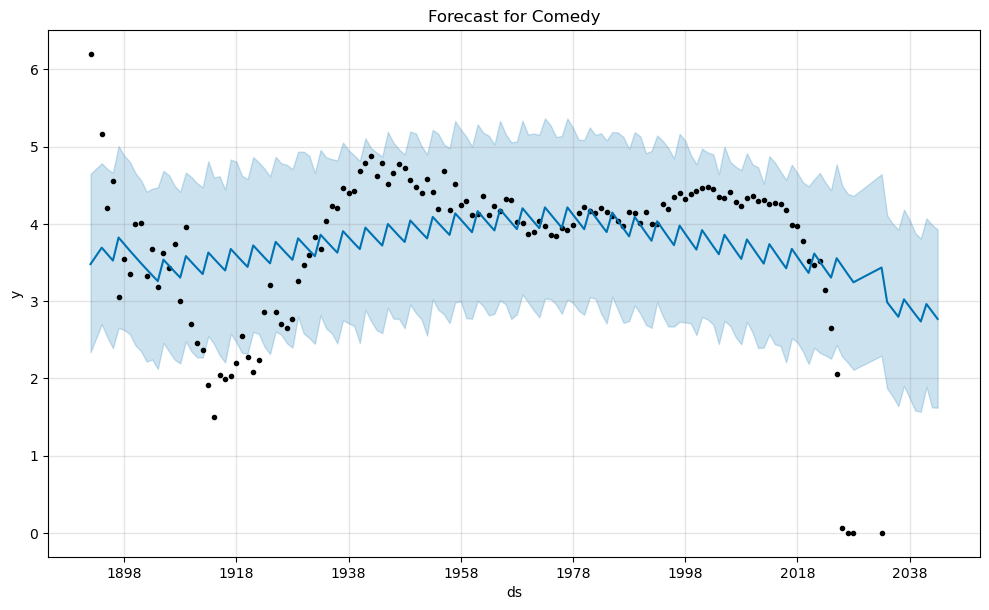

21:07:43 - cmdstanpy - INFO - Chain [1] start processing
21:07:43 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


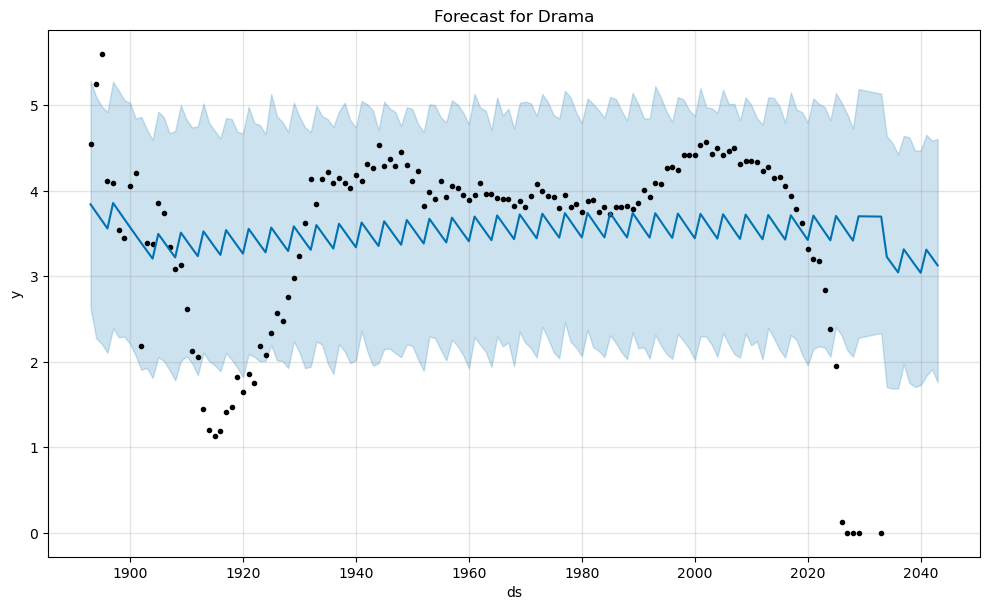

21:07:44 - cmdstanpy - INFO - Chain [1] start processing
21:07:44 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


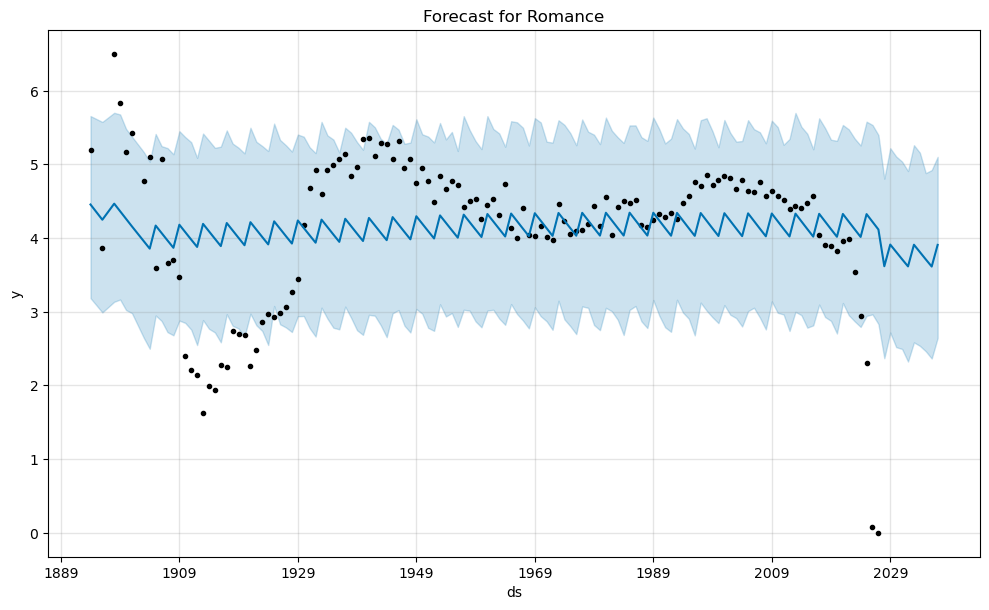

21:07:44 - cmdstanpy - INFO - Chain [1] start processing
21:07:44 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


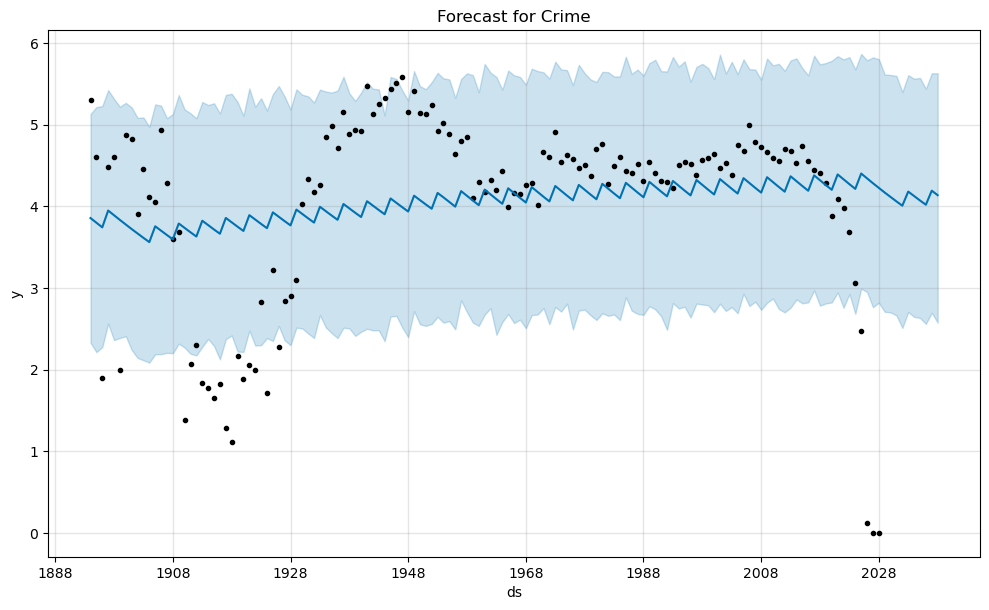

21:07:44 - cmdstanpy - INFO - Chain [1] start processing
21:07:44 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


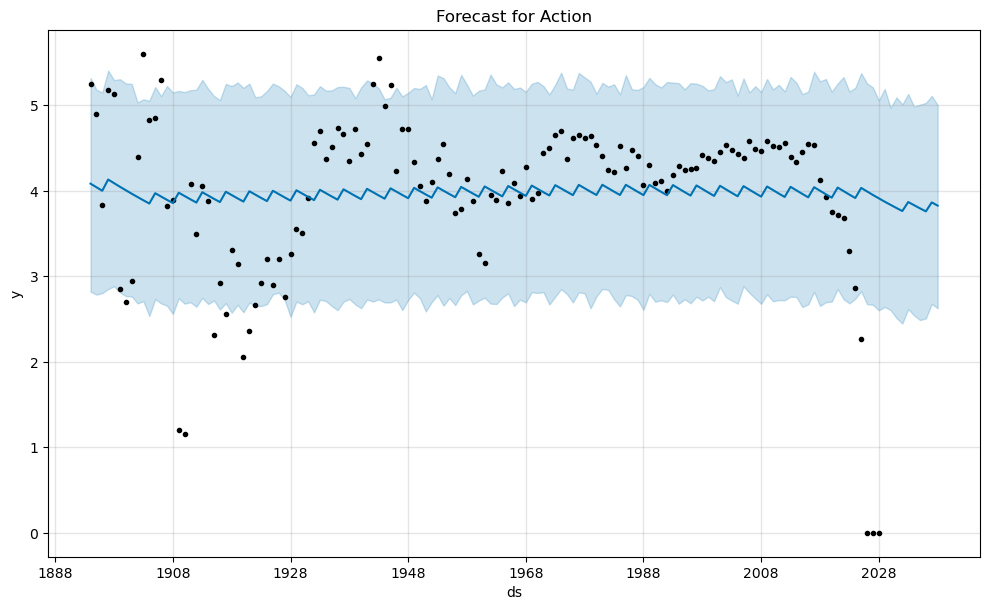

21:07:45 - cmdstanpy - INFO - Chain [1] start processing
21:07:45 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


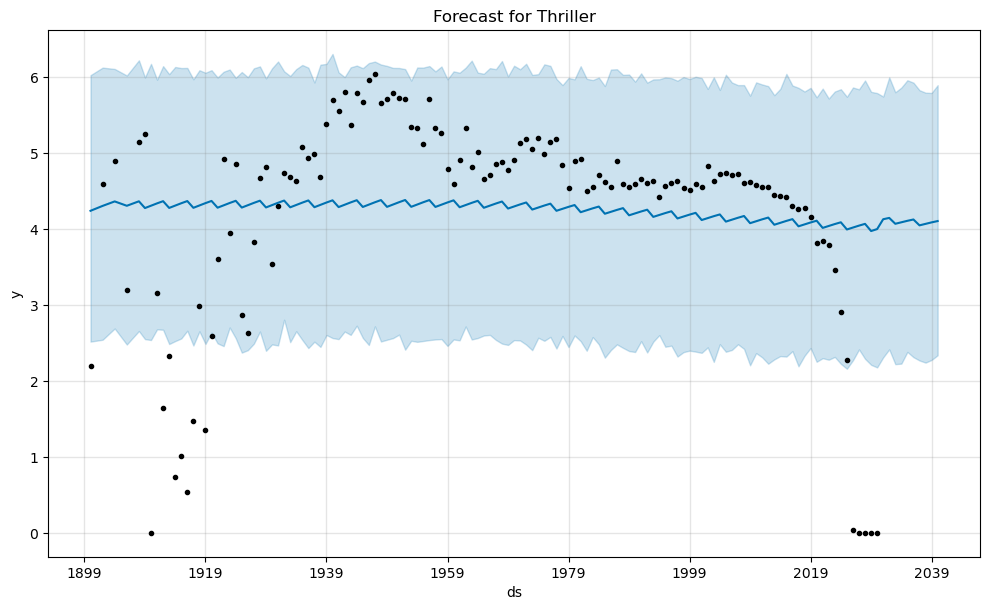

21:07:45 - cmdstanpy - INFO - Chain [1] start processing
21:07:45 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


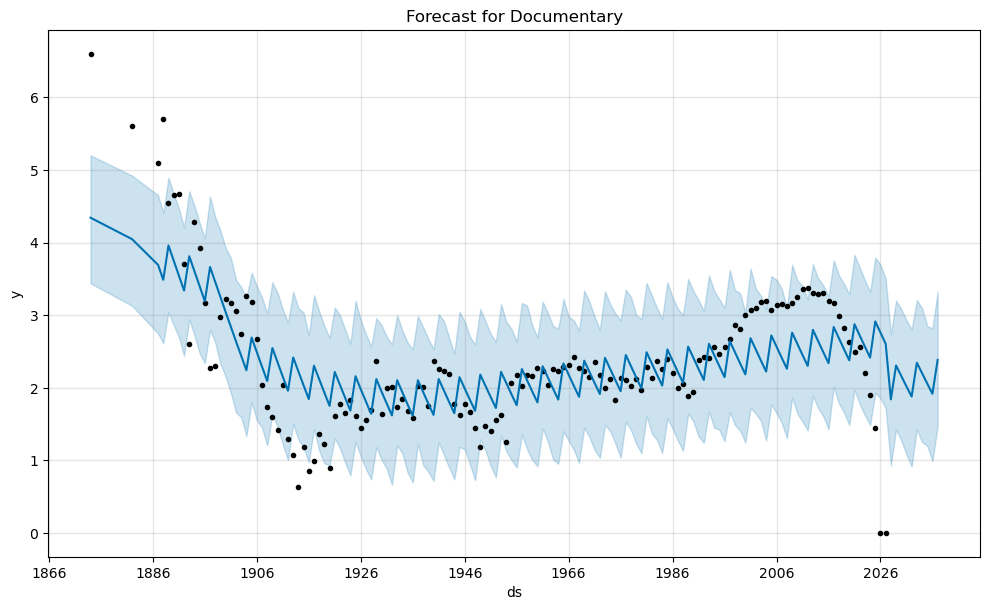

21:07:46 - cmdstanpy - INFO - Chain [1] start processing
21:07:46 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


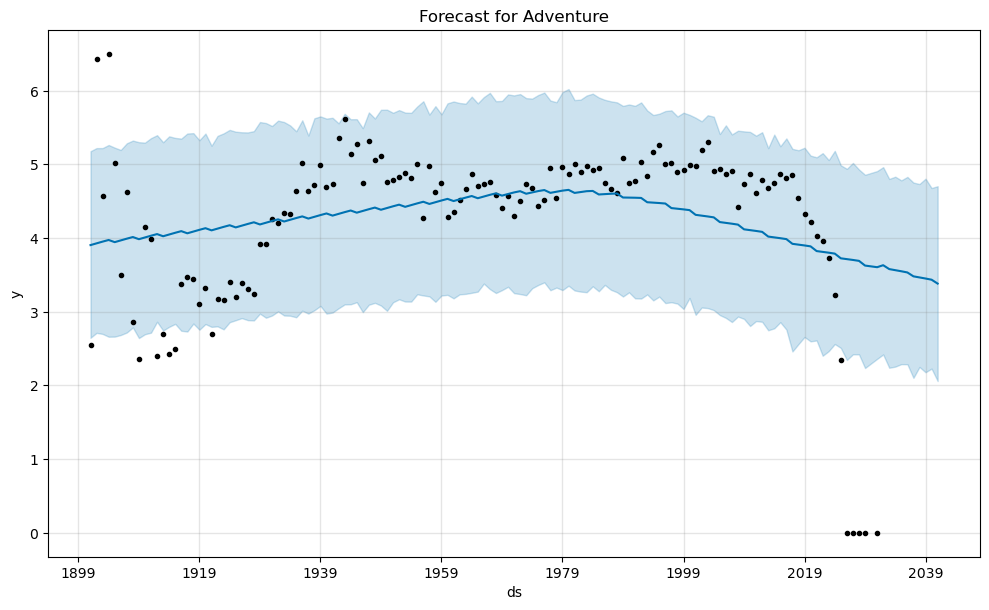

21:07:46 - cmdstanpy - INFO - Chain [1] start processing
21:07:46 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


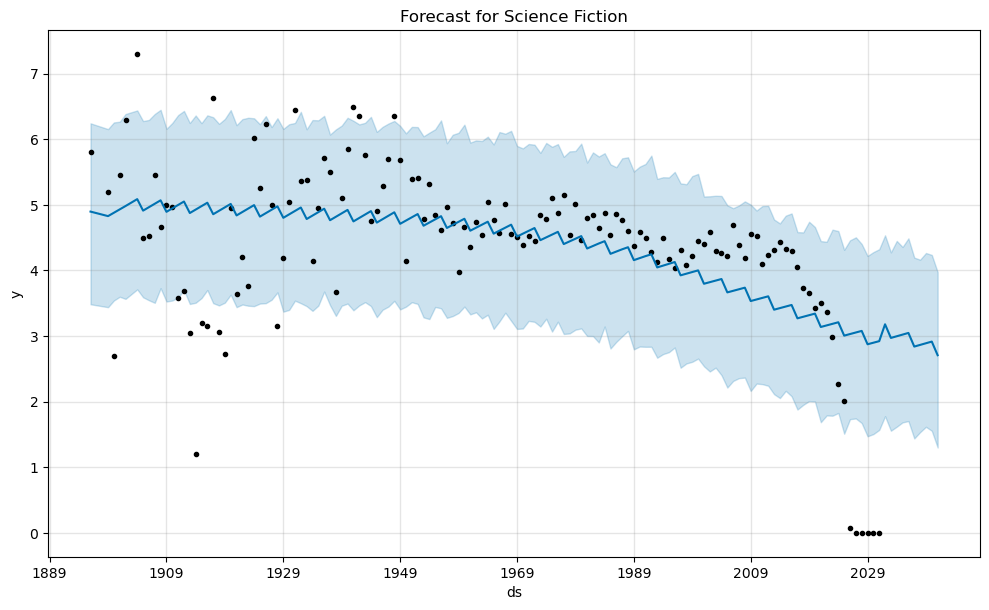

21:07:46 - cmdstanpy - INFO - Chain [1] start processing
21:07:46 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


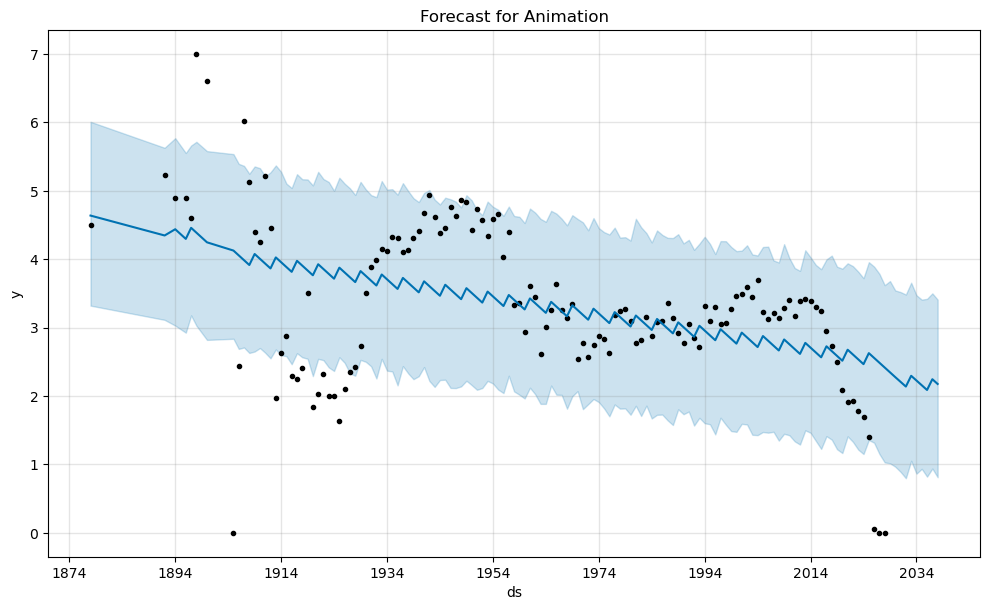

21:07:47 - cmdstanpy - INFO - Chain [1] start processing
21:07:47 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


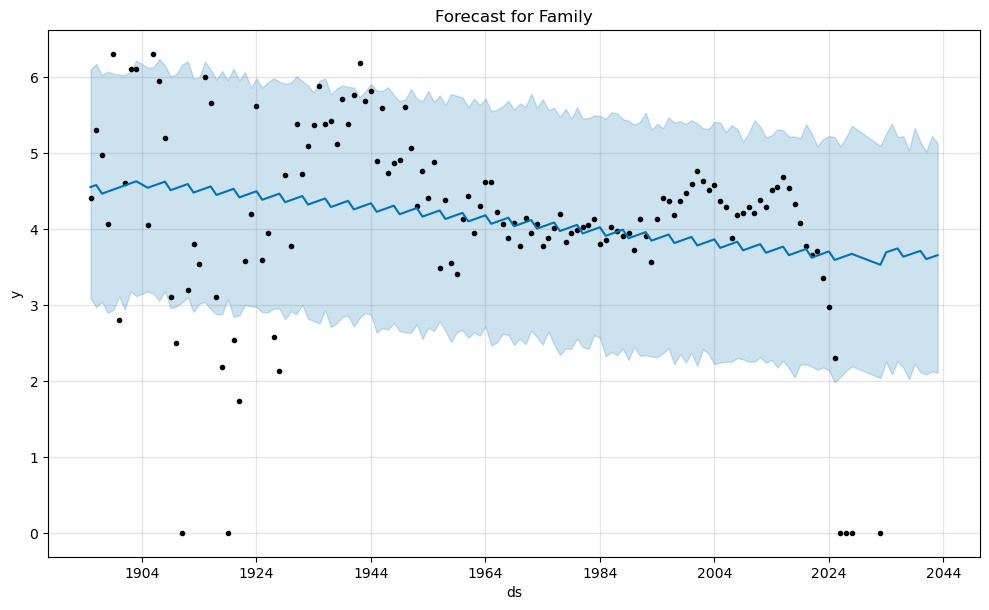

21:07:47 - cmdstanpy - INFO - Chain [1] start processing
21:07:47 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


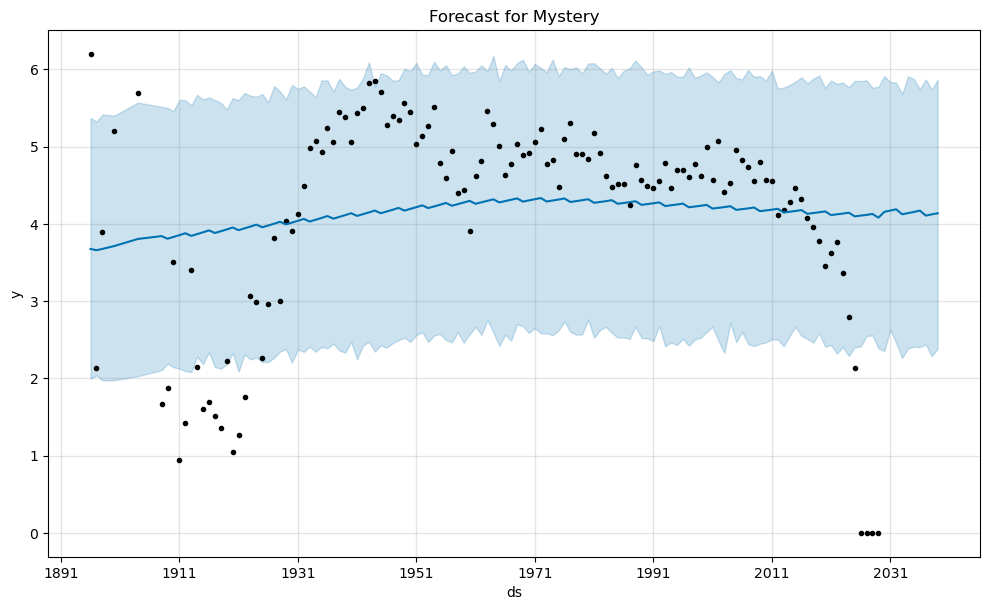

21:07:47 - cmdstanpy - INFO - Chain [1] start processing
21:07:47 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


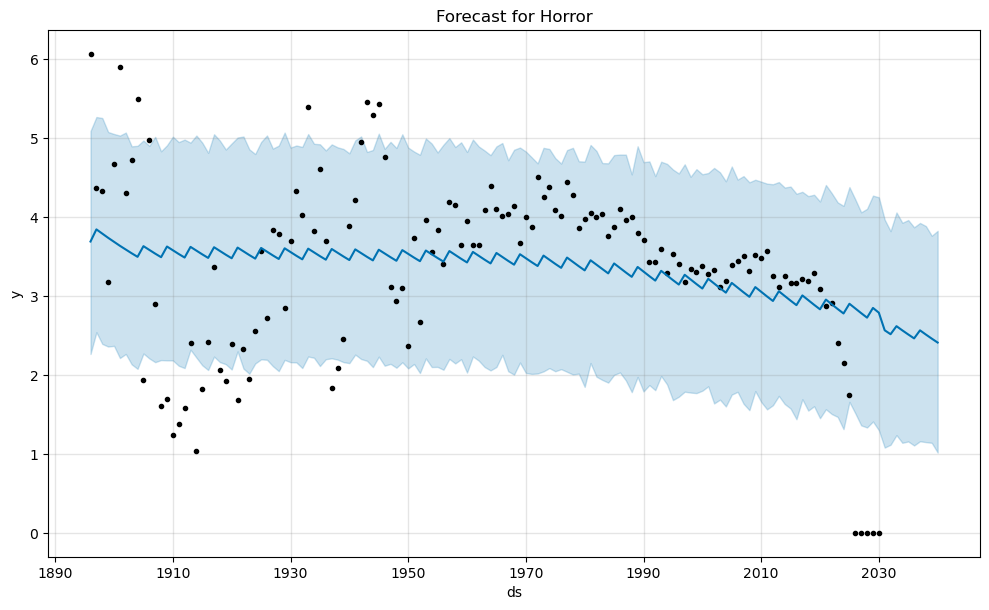

21:07:48 - cmdstanpy - INFO - Chain [1] start processing
21:07:48 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


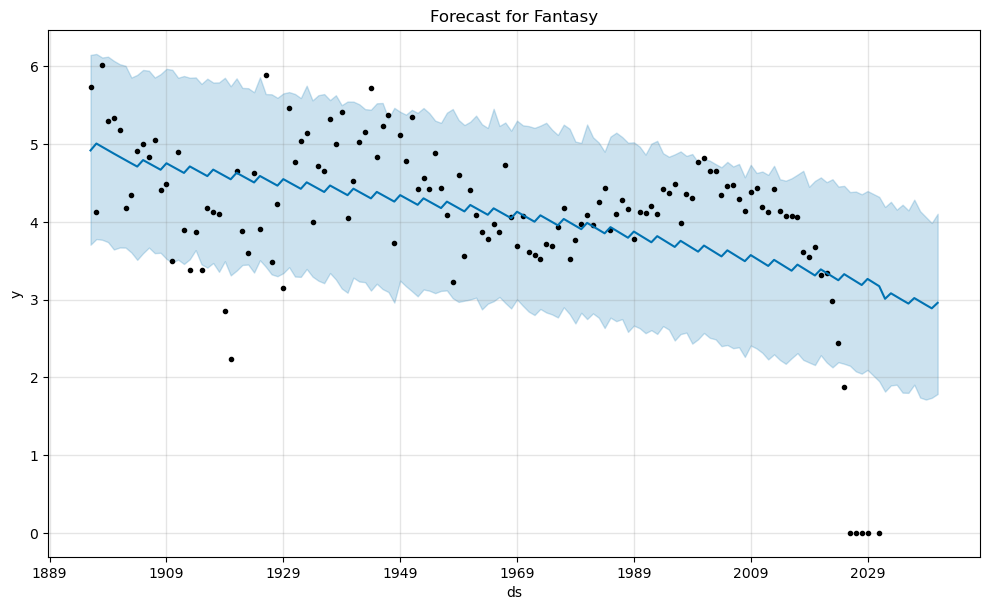

21:07:48 - cmdstanpy - INFO - Chain [1] start processing
21:07:48 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


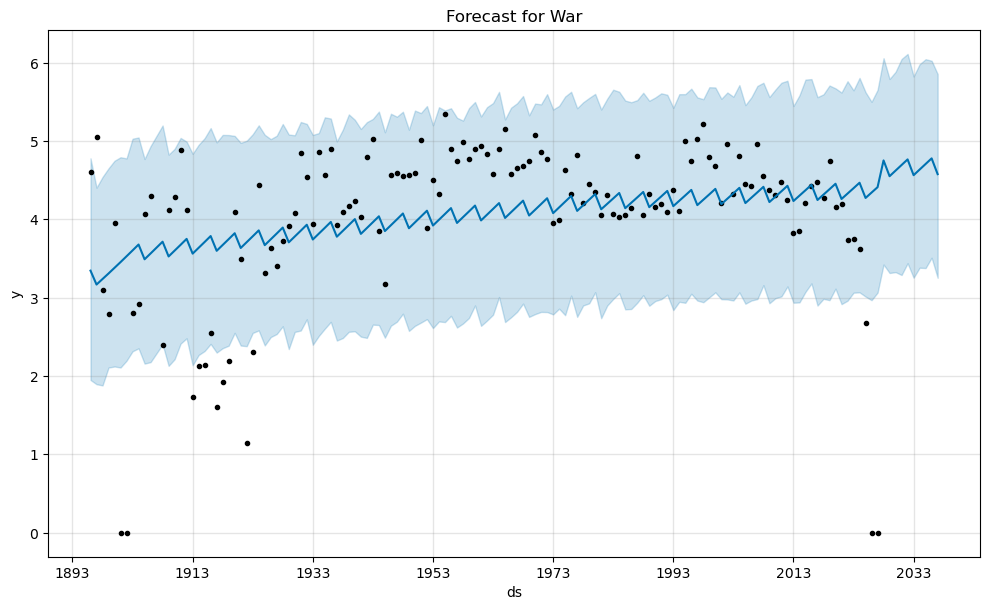

21:07:48 - cmdstanpy - INFO - Chain [1] start processing
21:07:48 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


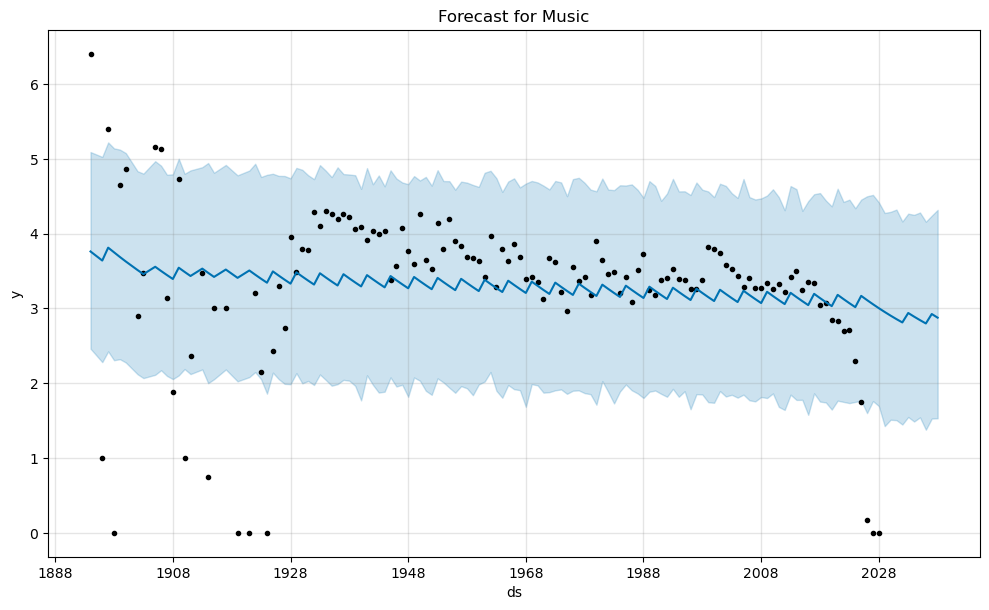

21:07:49 - cmdstanpy - INFO - Chain [1] start processing
21:07:49 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


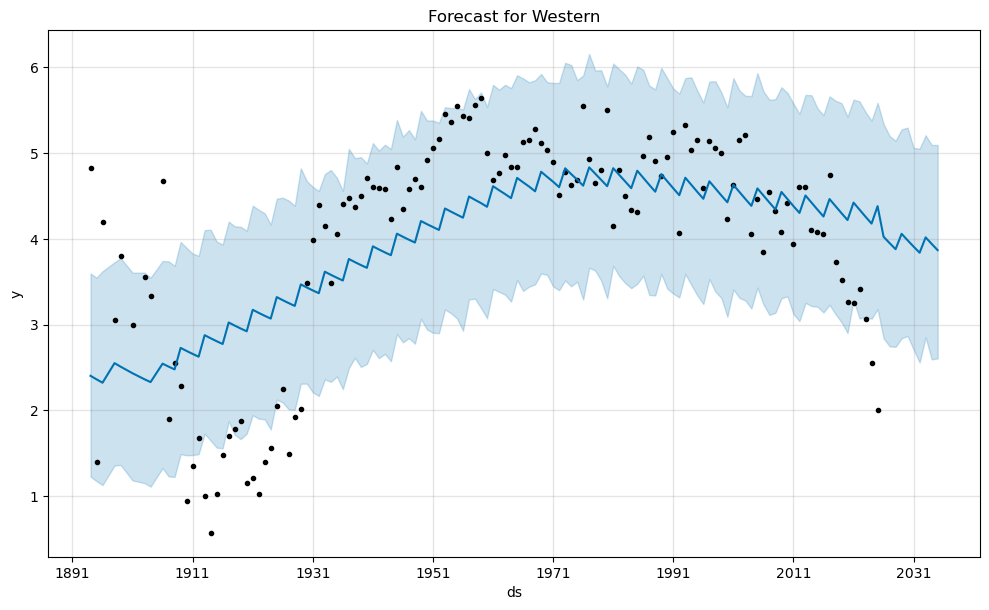

21:07:49 - cmdstanpy - INFO - Chain [1] start processing
21:07:49 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


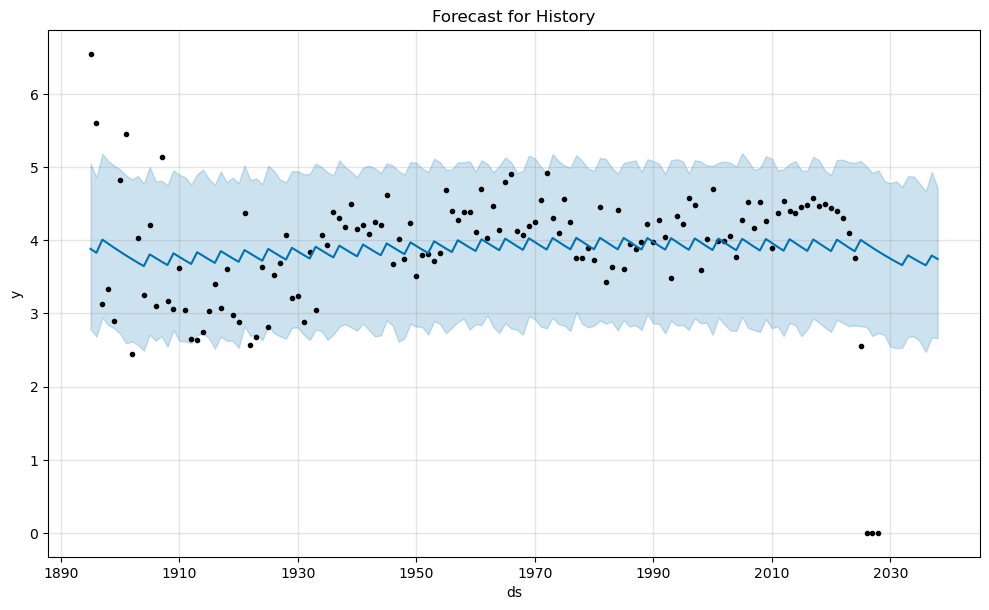

21:07:49 - cmdstanpy - INFO - Chain [1] start processing
21:07:50 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


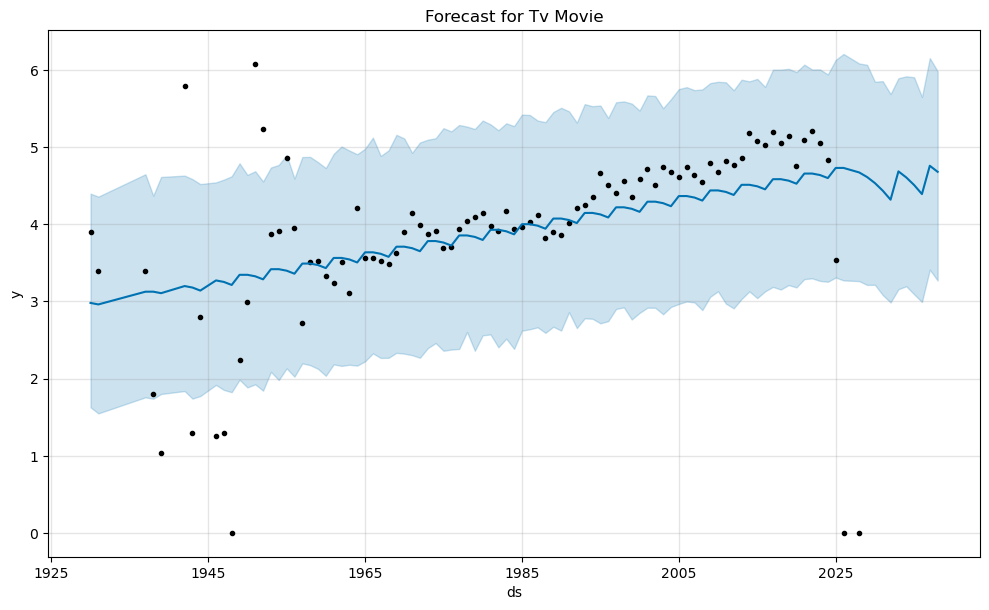

In [5]:
genres = movies_genre['genre'].unique()

for g in genres:
    df_genre = movies_genre[movies_genre['genre'] == g]
    df_genre = df_genre.groupby('year')['ratings'].mean().reset_index()

    # Prophet expects columns: ds (date) and y (value)
    df_genre = df_genre.rename(columns={'year': 'ds', 'ratings': 'y'})
    df_genre['ds'] = pd.to_datetime(df_genre['ds'], format='%Y')  

    if len(df_genre) < 5:  # skip if too little data
        continue

    m = Prophet()
    m.fit(df_genre)

    future = m.make_future_dataframe(periods=10, freq='Y')
    forecast = m.predict(future)

    # make one plot per genre
    fig = m.plot(forecast)
    mp.title(f"Forecast for {g}")
    mp.show()

#### Genre Forecast Analysis

- Most genres are in decline, but some remain stable. Forecasts predict a broad downward trend for genres such as Comedy, Romance, Sci-Fi, Animation, and Fantasy, with Animation facing the sharpest drop. In contrast, Drama, Thriller, History, and Mystery are expected to hold steady with only minor fluctuations.

- A few genres are experiencing notable growth. While many trends are negative, Crime, Action, and War show steady growth. TV Movies, in particular, stand out as the fastest-growing genre, continuing a strong upward climb past 2025.

- Some genres exhibit unique, volatile patterns. Documentary ratings are expected to fluctuate wildly and not recover past highs, while the Western genre is projected for significant long-term growth before tapering off into the 2030s. 

#### Takeaway:
Platforms that diversify into resilient genres like Crime or TV Movies may maintain engagement despite broader declines.